In [1]:
import numpy as np 
import pandas as pd 
import networkx as nx

In [2]:
file_paths = ['5G-Graphs/63/nodes.csv','5G-Graphs/99/nodes.csv','5G-Graphs/124/nodes.csv',
              '5G-Graphs/144/nodes.csv','5G-Graphs/157/nodes.csv','5G-Graphs/176/nodes.csv',
              '5G-Graphs/192/nodes.csv', '5G-Graphs/203/nodes.csv','5G-Graphs/205/nodes.csv',
              '5G-Graphs/217/nodes.csv', '5G-Graphs/220/nodes.csv', '5G-Graphs/251/nodes.csv',
              '5G-Graphs/256/nodes.csv', '5G-Graphs/270/nodes.csv', '5G-Graphs/275/nodes.csv',
              '5G-Graphs/283/nodes.csv', '5G-Graphs/286/nodes.csv', '5G-Graphs/306/nodes.csv',
              '5G-Graphs/308/nodes.csv', '5G-Graphs/313/nodes.csv', '5G-Graphs/315/nodes.csv',
              '5G-Graphs/320/nodes.csv', '5G-Graphs/322/nodes.csv', '5G-Graphs/325/nodes.csv',
              '5G-Graphs/330/nodes.csv', '5G-Graphs/334/nodes.csv', '5G-Graphs/345/nodes.csv', 
              '5G-Graphs/407/nodes.csv', '5G-Graphs/409/nodes.csv', '5G-Graphs/410/nodes.csv',
              ]

data_5G = []

for file_path in file_paths: 
    df = pd.read_csv(file_path)
    data_5G.append(df)

In [3]:
file_paths = ['5G-Graphs/63/edges.txt','5G-Graphs/99/edges.txt','5G-Graphs/124/edges.txt',
              '5G-Graphs/144/edges.txt','5G-Graphs/157/edges.txt','5G-Graphs/176/edges.txt',
              '5G-Graphs/192/edges.txt', '5G-Graphs/203/edges.txt','5G-Graphs/205/edges.txt',
              '5G-Graphs/217/edges.txt', '5G-Graphs/220/edges.txt', '5G-Graphs/251/edges.txt',
              '5G-Graphs/256/edges.txt', '5G-Graphs/270/edges.txt', '5G-Graphs/275/edges.txt',
              '5G-Graphs/283/edges.txt', '5G-Graphs/286/edges.txt', '5G-Graphs/306/edges.txt',
              '5G-Graphs/308/edges.txt', '5G-Graphs/313/edges.txt', '5G-Graphs/315/edges.txt',
              '5G-Graphs/320/edges.txt', '5G-Graphs/322/edges.txt', '5G-Graphs/325/edges.txt',
              '5G-Graphs/330/edges.txt', '5G-Graphs/334/edges.txt', '5G-Graphs/345/edges.txt', 
              '5G-Graphs/407/edges.txt', '5G-Graphs/409/edges.txt', '5G-Graphs/410/edges.txt',
              ]

graphs_5G = [] 

for file_path in file_paths: 
    G = nx.read_edgelist(file_path, create_using=nx.DiGraph)
    graphs_5G.append(G)


In [4]:
file_paths = ['non-conspiracy/38/nodes.csv', 'non-conspiracy/157/nodes.csv', 'non-conspiracy/241/nodes.csv',
              'non-conspiracy/799/nodes.csv', 'non-conspiracy/845/nodes.csv', 'non-conspiracy/847/nodes.csv',
              'non-conspiracy/862/nodes.csv','non-conspiracy/898/nodes.csv', 'non-conspiracy/968/nodes.csv',
              'non-conspiracy/1002/nodes.csv', 'non-conspiracy/1036/nodes.csv', 'non-conspiracy/1097/nodes.csv',
              'non-conspiracy/1520/nodes.csv', 'non-conspiracy/1660/nodes.csv', 'non-conspiracy/1706/nodes.csv',
              'non-conspiracy/1886/nodes.csv', 'non-conspiracy/1937/nodes.csv', 'non-conspiracy/1948/nodes.csv',
              'non-conspiracy/1950/nodes.csv', 'non-conspiracy/2366/nodes.csv'
              ]

data_nc = []

for file_path in file_paths: 
    df = pd.read_csv(file_path)
    data_nc.append(df)

In [5]:
file_paths = ['non-conspiracy/38/edges.txt', 'non-conspiracy/157/edges.txt', 'non-conspiracy/241/edges.txt',
              'non-conspiracy/799/edges.txt', 'non-conspiracy/845/edges.txt', 'non-conspiracy/847/edges.txt',
              'non-conspiracy/862/edges.txt','non-conspiracy/898/edges.txt', 'non-conspiracy/968/edges.txt',
              'non-conspiracy/1002/edges.txt', 'non-conspiracy/1036/edges.txt', 'non-conspiracy/1097/edges.txt',
              'non-conspiracy/1520/edges.txt', 'non-conspiracy/1660/edges.txt', 'non-conspiracy/1706/edges.txt',
              'non-conspiracy/1886/edges.txt', 'non-conspiracy/1937/edges.txt', 'non-conspiracy/1948/edges.txt',
              'non-conspiracy/1950/edges.txt', 'non-conspiracy/2366/edges.txt'
              ]

graphs_nc = []

for file_path in file_paths: 
    G = nx.read_edgelist(file_path, create_using=nx.DiGraph)
    graphs_nc.append(df)

/var/folders/6j/t5fl1f2d4mx63bn_p5fbl4pw0000gn/T/ipykernel_98499/1511193102.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([conspiracy_durations, non_conspiracy_durations], labels=['Conspiracy', 'Non-Conspiracy'])


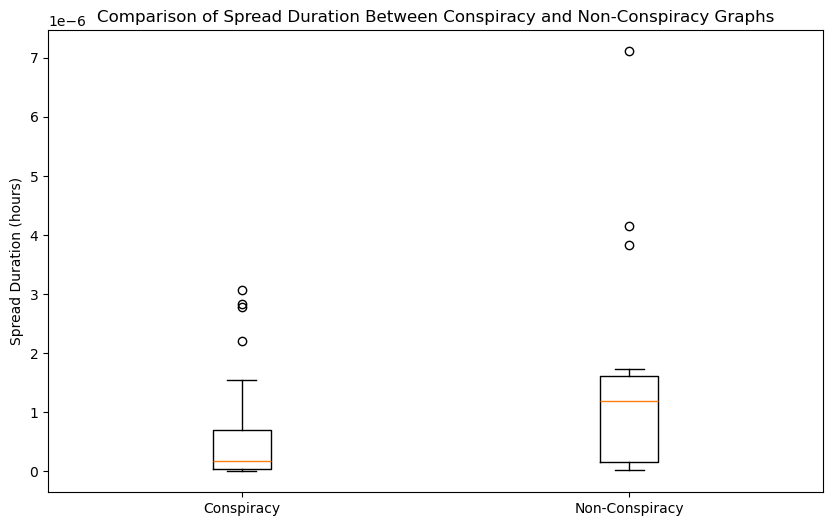

In [6]:
# Time of the spread conspiracy vs non-conspiracy
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Sample function to extract spread duration for a node DataFrame
def compute_spread_duration(df):
    # Convert time column to datetime
    df['time'] = pd.to_datetime(df['time'])
    start_time = df['time'].min()
    end_time = df['time'].max()
    duration = (end_time - start_time).total_seconds() / 3600  # duration in hours
    return start_time, end_time, duration

# Compute spread durations for conspiracy samples
conspiracy_durations = []
for df in data_5G:
    _, _, dur = compute_spread_duration(df)
    conspiracy_durations.append(dur)

# Compute spread durations for non-conspiracy samples
non_conspiracy_durations = []
for df in data_nc:
    _, _, dur = compute_spread_duration(df)
    non_conspiracy_durations.append(dur)

# Plotting comparison
plt.figure(figsize=(10, 6))
plt.boxplot([conspiracy_durations, non_conspiracy_durations], labels=['Conspiracy', 'Non-Conspiracy'])
plt.ylabel("Spread Duration (hours)")
plt.title("Comparison of Spread Duration Between Conspiracy and Non-Conspiracy Graphs")
plt.show()


/var/folders/6j/t5fl1f2d4mx63bn_p5fbl4pw0000gn/T/ipykernel_98499/1778179074.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([conspiracy_durations, non_conspiracy_durations],


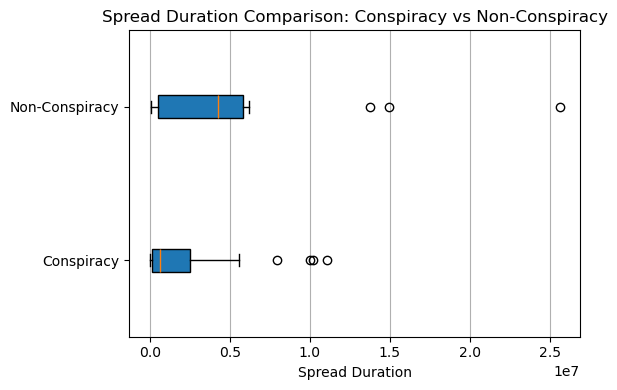

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Compute spread duration
def compute_spread_duration(df):
    df['time'] = pd.to_numeric(df['time'], errors='coerce')
    df = df.dropna(subset=['time'])
    duration = df['time'].max() - df['time'].min()
    return duration

# Calculate durations
conspiracy_durations = [compute_spread_duration(df) for df in data_5G]
non_conspiracy_durations = [compute_spread_duration(df) for df in data_nc]

# Plot horizontal boxplot
plt.figure(figsize=(6,4))
plt.boxplot([conspiracy_durations, non_conspiracy_durations],
            vert=False,
            patch_artist=True,
            labels=['Conspiracy', 'Non-Conspiracy'])
plt.xlabel("Spread Duration")
plt.title("Spread Duration Comparison: Conspiracy vs Non-Conspiracy")
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


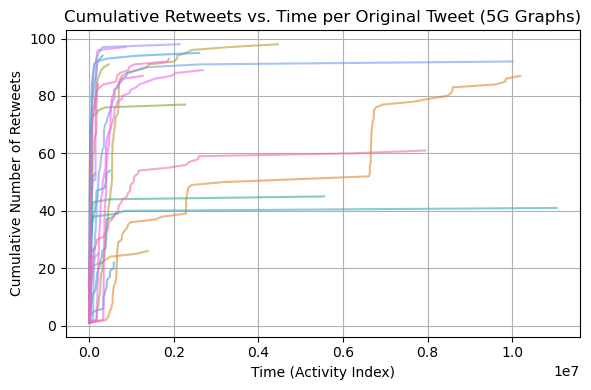

In [18]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_paths = ['5G-Graphs/63/nodes.csv','5G-Graphs/99/nodes.csv','5G-Graphs/124/nodes.csv',
              '5G-Graphs/144/nodes.csv','5G-Graphs/157/nodes.csv','5G-Graphs/176/nodes.csv',
              '5G-Graphs/192/nodes.csv', '5G-Graphs/203/nodes.csv','5G-Graphs/205/nodes.csv',
              '5G-Graphs/217/nodes.csv', '5G-Graphs/220/nodes.csv', '5G-Graphs/251/nodes.csv',
              '5G-Graphs/256/nodes.csv', '5G-Graphs/270/nodes.csv', '5G-Graphs/275/nodes.csv',
              '5G-Graphs/283/nodes.csv', '5G-Graphs/286/nodes.csv', '5G-Graphs/306/nodes.csv',
              '5G-Graphs/308/nodes.csv', '5G-Graphs/313/nodes.csv', '5G-Graphs/315/nodes.csv',
              '5G-Graphs/320/nodes.csv', '5G-Graphs/322/nodes.csv', '5G-Graphs/325/nodes.csv',
              '5G-Graphs/330/nodes.csv', '5G-Graphs/334/nodes.csv', '5G-Graphs/345/nodes.csv', 
              '5G-Graphs/407/nodes.csv', '5G-Graphs/409/nodes.csv', '5G-Graphs/410/nodes.csv']

multi_retweet_records = []

for file_path in file_paths:
    graph_id = os.path.basename(os.path.dirname(file_path))
    try:
        df = pd.read_csv(file_path)
        if 'time' not in df.columns:
            continue
        df['time'] = pd.to_numeric(df['time'], errors='coerce')
        df = df.dropna(subset=['time'])
        df = df.sort_values('time')
        df['cumulative_retweets'] = range(1, len(df) + 1)
        
        for t, r in zip(df['time'], df['cumulative_retweets']):
            multi_retweet_records.append({'graph': graph_id, 'time': t, 'retweets': r})
    except Exception as e:
        print(f"Error reading {file_path}: {e}")

# Create DataFrame and plot
multi_retweet_df = pd.DataFrame(multi_retweet_records)

from matplotlib.ticker import ScalarFormatter

plt.figure(figsize=(6,4))
sns.lineplot(data=multi_retweet_df, x='time', y='retweets', hue='graph', legend=False, alpha=0.6)
plt.title("Cumulative Retweets vs. Time per Original Tweet (5G Graphs)")
plt.xlabel("Time (Activity Index)")
plt.ylabel("Cumulative Number of Retweets")
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)
plt.tight_layout()
plt.show()



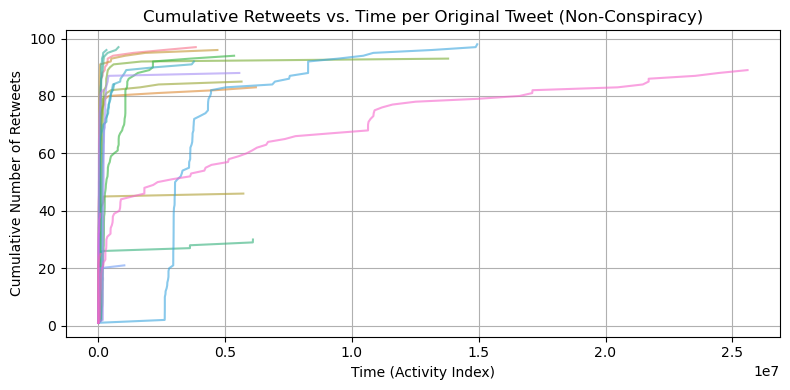

In [25]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_paths = ['non-conspiracy/38/nodes.csv', 'non-conspiracy/157/nodes.csv', 'non-conspiracy/241/nodes.csv',
              'non-conspiracy/799/nodes.csv', 'non-conspiracy/845/nodes.csv', 'non-conspiracy/847/nodes.csv',
              'non-conspiracy/862/nodes.csv','non-conspiracy/898/nodes.csv', 'non-conspiracy/968/nodes.csv',
              'non-conspiracy/1002/nodes.csv', 'non-conspiracy/1036/nodes.csv', 'non-conspiracy/1097/nodes.csv',
              'non-conspiracy/1520/nodes.csv', 'non-conspiracy/1660/nodes.csv', 'non-conspiracy/1706/nodes.csv',
              'non-conspiracy/1886/nodes.csv', 'non-conspiracy/1937/nodes.csv', 'non-conspiracy/1948/nodes.csv',
              'non-conspiracy/1950/nodes.csv', 'non-conspiracy/2366/nodes.csv']

multi_retweet_records = []

for file_path in file_paths:
    graph_id = os.path.basename(os.path.dirname(file_path))
    try:
        df = pd.read_csv(file_path)
        if 'time' not in df.columns:
            continue
        df['time'] = pd.to_numeric(df['time'], errors='coerce')
        df = df.dropna(subset=['time'])
        df = df.sort_values('time')
        df['cumulative_retweets'] = range(1, len(df) + 1)
        
        for t, r in zip(df['time'], df['cumulative_retweets']):
            multi_retweet_records.append({'graph': graph_id, 'time': t, 'retweets': r})
    except Exception as e:
        print(f"Error reading {file_path}: {e}")

# Create DataFrame and plot
multi_retweet_df = pd.DataFrame(multi_retweet_records)

from matplotlib.ticker import ScalarFormatter

plt.figure(figsize=(8,4))
sns.lineplot(data=multi_retweet_df, x='time', y='retweets', hue='graph', legend=False, alpha=0.6)
plt.title("Cumulative Retweets vs. Time per Original Tweet (Non-Conspiracy)")
plt.xlabel("Time (Activity Index)")
plt.ylabel("Cumulative Number of Retweets")
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
plt.ticklabel_format(style='plain', axis='y')  # disables scientific notation
plt.grid(True)
plt.tight_layout()
plt.show()



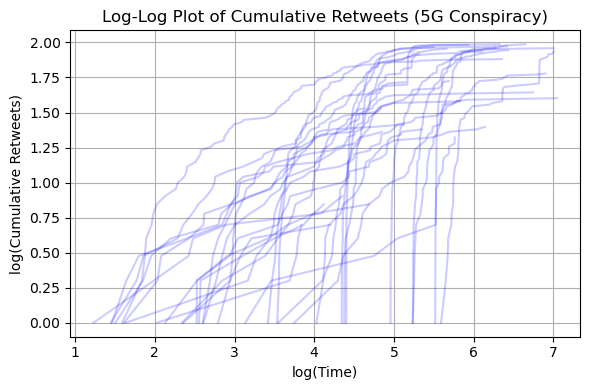

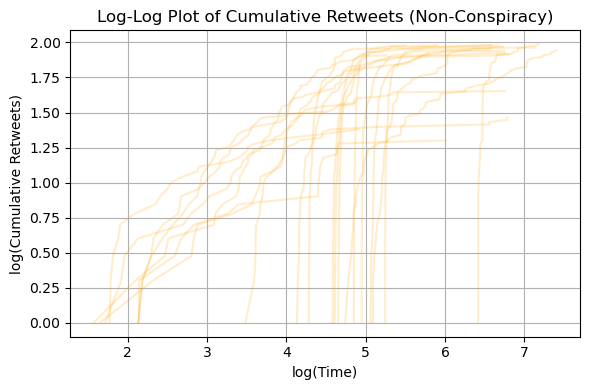

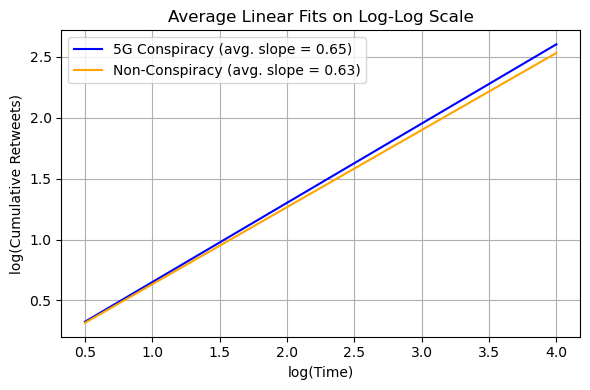

In [24]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

file_paths_5g = ['5G-Graphs/63/nodes.csv','5G-Graphs/99/nodes.csv','5G-Graphs/124/nodes.csv',
                 '5G-Graphs/144/nodes.csv','5G-Graphs/157/nodes.csv','5G-Graphs/176/nodes.csv',
                 '5G-Graphs/192/nodes.csv', '5G-Graphs/203/nodes.csv','5G-Graphs/205/nodes.csv',
                 '5G-Graphs/217/nodes.csv', '5G-Graphs/220/nodes.csv', '5G-Graphs/251/nodes.csv',
                 '5G-Graphs/256/nodes.csv', '5G-Graphs/270/nodes.csv', '5G-Graphs/275/nodes.csv',
                 '5G-Graphs/283/nodes.csv', '5G-Graphs/286/nodes.csv', '5G-Graphs/306/nodes.csv',
                 '5G-Graphs/308/nodes.csv', '5G-Graphs/313/nodes.csv', '5G-Graphs/315/nodes.csv',
                 '5G-Graphs/320/nodes.csv', '5G-Graphs/322/nodes.csv', '5G-Graphs/325/nodes.csv',
                 '5G-Graphs/330/nodes.csv', '5G-Graphs/334/nodes.csv', '5G-Graphs/345/nodes.csv',
                 '5G-Graphs/407/nodes.csv', '5G-Graphs/409/nodes.csv', '5G-Graphs/410/nodes.csv']

file_paths_nc = ['non-conspiracy/38/nodes.csv', 'non-conspiracy/157/nodes.csv', 'non-conspiracy/241/nodes.csv',
                 'non-conspiracy/799/nodes.csv', 'non-conspiracy/845/nodes.csv', 'non-conspiracy/847/nodes.csv',
                 'non-conspiracy/862/nodes.csv','non-conspiracy/898/nodes.csv', 'non-conspiracy/968/nodes.csv',
                 'non-conspiracy/1002/nodes.csv', 'non-conspiracy/1036/nodes.csv', 'non-conspiracy/1097/nodes.csv',
                 'non-conspiracy/1520/nodes.csv', 'non-conspiracy/1660/nodes.csv', 'non-conspiracy/1706/nodes.csv',
                 'non-conspiracy/1886/nodes.csv', 'non-conspiracy/1937/nodes.csv', 'non-conspiracy/1948/nodes.csv',
                 'non-conspiracy/1950/nodes.csv', 'non-conspiracy/2366/nodes.csv']

# Function to load and process cumulative retweets per graph
def load_retweet_data(file_paths):
    records = []
    for file_path in file_paths:
        graph_id = os.path.basename(os.path.dirname(file_path))
        try:
            df = pd.read_csv(file_path)
            if 'time' not in df.columns:
                continue
            df['time'] = pd.to_numeric(df['time'], errors='coerce')
            df = df.dropna(subset=['time'])
            df = df.sort_values('time')
            df['cumulative_retweets'] = range(1, len(df) + 1)
            for t, r in zip(df['time'], df['cumulative_retweets']):
                records.append({'graph': graph_id, 'time': t, 'retweets': r})
        except Exception as e:
            print(f"Error reading {file_path}: {e}")
    return pd.DataFrame(records)

df_5g = load_retweet_data(file_paths_5g)
df_nc = load_retweet_data(file_paths_nc)

# Function to compute log-log linear fits and slopes
def compute_log_log_fits(df):
    slopes = []
    fits = []
    for graph_id, grp in df.groupby('graph'):
        x = grp['time'].values
        y = grp['retweets'].values
        x = x[x > 0]
        y = y[:len(x)]
        if len(x) < 2:
            continue
        log_x = np.log10(x)
        log_y = np.log10(y[:len(log_x)])
        slope, intercept, _, _, _ = linregress(log_x, log_y)
        slopes.append(slope)
        fits.append({
            'graph': graph_id,
            'log_x': log_x,
            'log_y': log_y,
            'fit_y': slope * log_x + intercept
        })
    return slopes, fits

# Compute linear fits for both categories
slopes_5g, fits_5g = compute_log_log_fits(df_5g)
slopes_nc, fits_nc = compute_log_log_fits(df_nc)

# Plot 1: Log-Log for 5G
plt.figure(figsize=(6,4))
for fit in fits_5g:
    plt.plot(fit['log_x'], fit['log_y'], alpha=0.2, color='blue')
plt.title("Log-Log Plot of Cumulative Retweets (5G Conspiracy)")
plt.xlabel("log(Time)")
plt.ylabel("log(Cumulative Retweets)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 2: Log-Log for Non-Conspiracy
plt.figure(figsize=(6,4))
for fit in fits_nc:
    plt.plot(fit['log_x'], fit['log_y'], alpha=0.2, color='orange')
plt.title("Log-Log Plot of Cumulative Retweets (Non-Conspiracy)")
plt.xlabel("log(Time)")
plt.ylabel("log(Cumulative Retweets)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Compute average slopes
avg_slope_5g = np.mean(slopes_5g)
avg_slope_nc = np.mean(slopes_nc)

# Plot 3: Average Linear Fits
log_x_common = np.linspace(0.5, 4, 100)
fit_5g = avg_slope_5g * log_x_common
fit_nc = avg_slope_nc * log_x_common

plt.figure(figsize=(6,4))
plt.plot(log_x_common, fit_5g, label=f"5G Conspiracy (avg. slope = {avg_slope_5g:.2f})", color='blue')
plt.plot(log_x_common, fit_nc, label=f"Non-Conspiracy (avg. slope = {avg_slope_nc:.2f})", color='orange')
plt.title("Average Linear Fits on Log-Log Scale")
plt.xlabel("log(Time)")
plt.ylabel("log(Cumulative Retweets)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


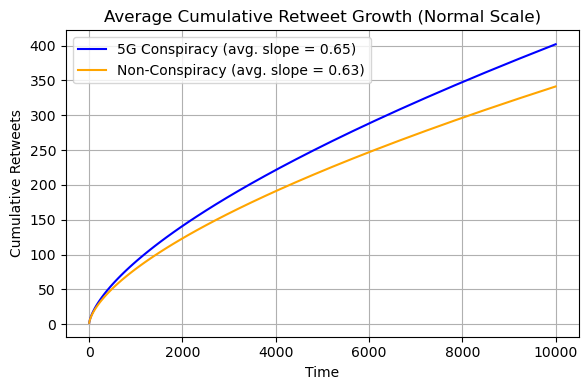

In [23]:
# Reverse log10 back to normal time and cumulative retweets
x_normal = 10 ** log_x_common
y_5g_normal = 10 ** fit_5g
y_nc_normal = 10 ** fit_nc

# Plot on linear scale
plt.figure(figsize=(6,4))
plt.plot(x_normal, y_5g_normal, label=f"5G Conspiracy (avg. slope = {avg_slope_5g:.2f})", color='blue')
plt.plot(x_normal, y_nc_normal, label=f"Non-Conspiracy (avg. slope = {avg_slope_nc:.2f})", color='orange')
plt.title("Average Cumulative Retweet Growth (Normal Scale)")
plt.xlabel("Time")
plt.ylabel("Cumulative Retweets")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [12]:
spread_durations = []

for file_path in file_paths_5g:
    try:
        df = pd.read_csv(file_path)
        df['time'] = pd.to_numeric(df['time'], errors='coerce')
        df = df.dropna(subset=['time'])
        duration = df['time'].max() - df['time'].min()
        graph_id = os.path.basename(os.path.dirname(file_path))
        spread_durations.append((graph_id, duration))
    except Exception as e:
        print(f"Error in {file_path}: {e}")

# Find the graph with the smallest spread duration
fastest_graph = min(spread_durations, key=lambda x: x[1])
print(f"Graph with fastest spread: {fastest_graph[0]} (Duration: {fastest_graph[1]})")


Graph with fastest spread: 192 (Duration: 6936)
